In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

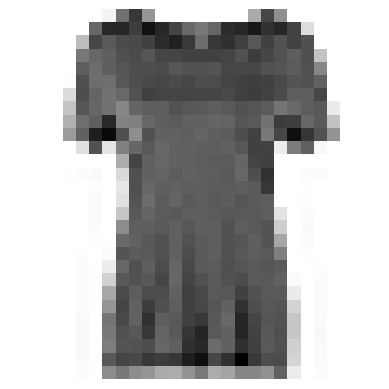

In [ ]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

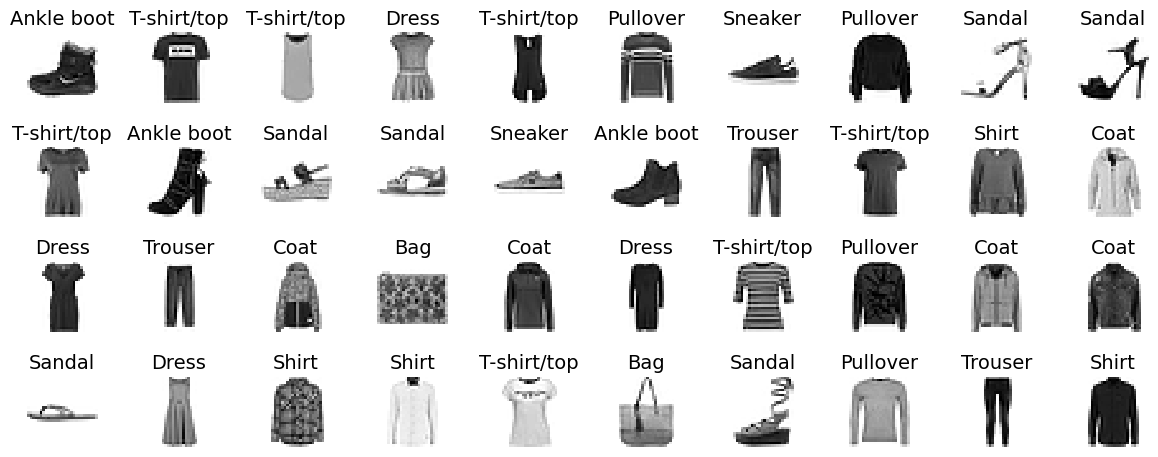

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))



In [ ]:
hidden1 = model.layers[1]

In [ ]:
weights,biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10


1719/1719 [==============================] - 13s 7ms/step - loss: 0.7041 - accuracy: 0.7660 - val_loss: 0.5030 - val_accuracy: 0.8300
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4820 - accuracy: 0.8325 - val_loss: 0.4655 - val_accuracy: 0.8328
Epoch 3/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4376 - accuracy: 0.8455 - val_loss: 0.4211 - val_accuracy: 0.8522
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4132 - accuracy: 0.8556 - val_loss: 0.3965 - val_accuracy: 0.8584
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3928 - accuracy: 0.8615 - val_loss: 0.3933 - val_accuracy: 0.8612
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3769 - accuracy: 0.8667 - val_loss: 0.3918 - val_accuracy: 0.8638
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3646 - accuracy: 0.8701 - val_loss: 0.3739 - val_a

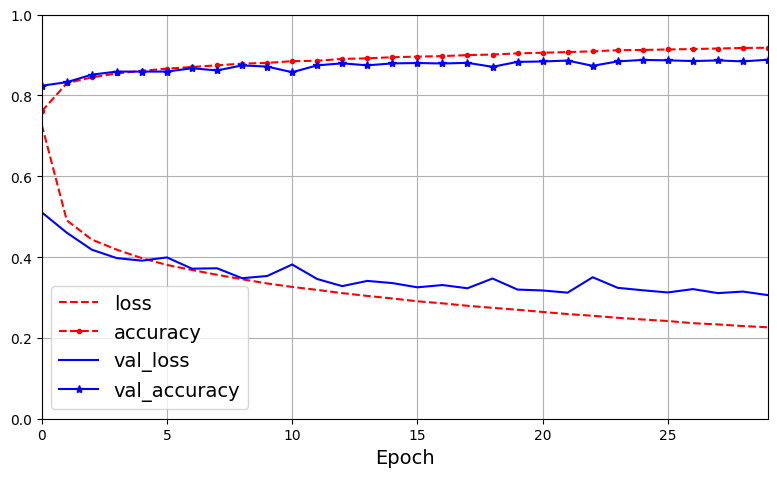

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
save_fig("keras_learning_curves_plot")  # extra code
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3755 - accuracy: 0.8654


[0.37552574276924133, 0.8654000163078308]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 215ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.2 , 0.  , 0.72],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [ ]:
import numpy as np
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

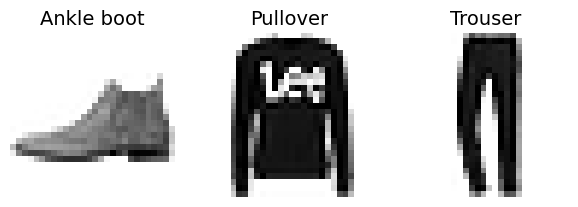

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [ ]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [ ]:
from sklearn.model_selection import train_test_split
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [ ]:
X_train

array([[   3.5214    ,   15.        ,    3.04994451, ...,    1.60599334,
          37.63      , -122.43      ],
       [   5.3275    ,    5.        ,    6.49005964, ...,    3.44333996,
          33.69      , -117.39      ],
       [   3.1       ,   29.        ,    7.54237288, ...,    2.25084746,
          38.44      , -122.98      ],
       ...,
       [   1.5561    ,   35.        ,    4.13993174, ...,    3.27645051,
          34.11      , -117.29      ],
       [   2.1055    ,   52.        ,    5.17849462, ...,    2.92688172,
          36.76      , -119.79      ],
       [   5.6022    ,   31.        ,    6.21971253, ...,    2.53798768,
          38.04      , -122.2       ]])

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
        norm_layer,
        tf.keras.layers.Dense(50,activation="relu"),
        tf.keras.layers.Dense(50,activation="relu"),
        tf.keras.layers.Dense(50,activation="relu"),
        tf.keras.layers.Dense(1)
    ])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse",optimizer=optimizer,metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

#history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 0.7750 - root_mean_squared_error: 0.8803 - val_loss: 0.3797 - val_root_mean_squared_error: 0.6162
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3789 - root_mean_squared_error: 0.6156 - val_loss: 0.8898 - val_root_mean_squared_error: 0.9433
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3606 - root_mean_squared_error: 0.6005 - val_loss: 0.3300 - val_root_mean_squared_error: 0.5744
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3418 - root_mean_squared_error: 0.5847 - val_loss: 0.5305 - val_root_mean_squared_error: 0.7284
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3344 - root_mean_squared_error: 0.5783 - val_loss: 1.4097 - val_root_mean_squared_error: 1.1873
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3306 - root_mean_squared_error: 0.5749 - val_loss: 0.3869 - val_

In [ ]:
mse_test, rmse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2837 - root_mean_squared_error: 0.5326


In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 126ms/step


In [ ]:
y_pred

array([[0.5215905],
       [1.0599287],
       [5.1871443]], dtype=float32)